In [ ]:
# Useful site for looking at all the projection options:
# https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html

In [2]:
# Modified from https://www.youtube.com/watch?v=4M2aiHvhr5Y&t=40s
# pip install cartopy

import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from cartopy import config
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER

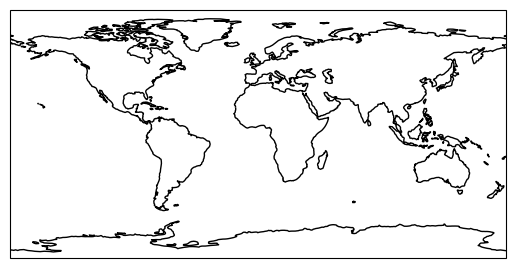

In [3]:
map1 = plt.axes(projection=ccrs.PlateCarree())
map1.coastlines()

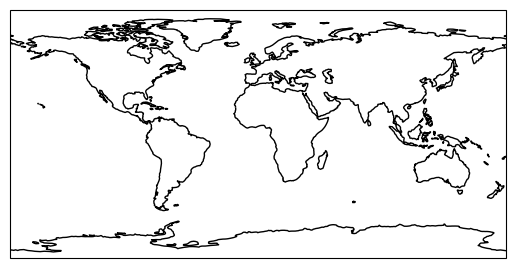

In [4]:
fig = plt.figure()
map2 = fig.add_subplot(projection=ccrs.PlateCarree())
map2.coastlines()

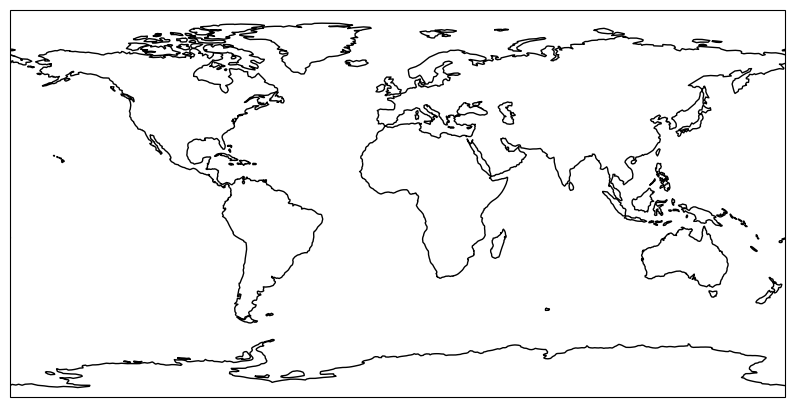

In [5]:
fig = plt.figure(figsize=(10,10))
map3 = fig.add_subplot(projection=ccrs.PlateCarree())
map3.coastlines()

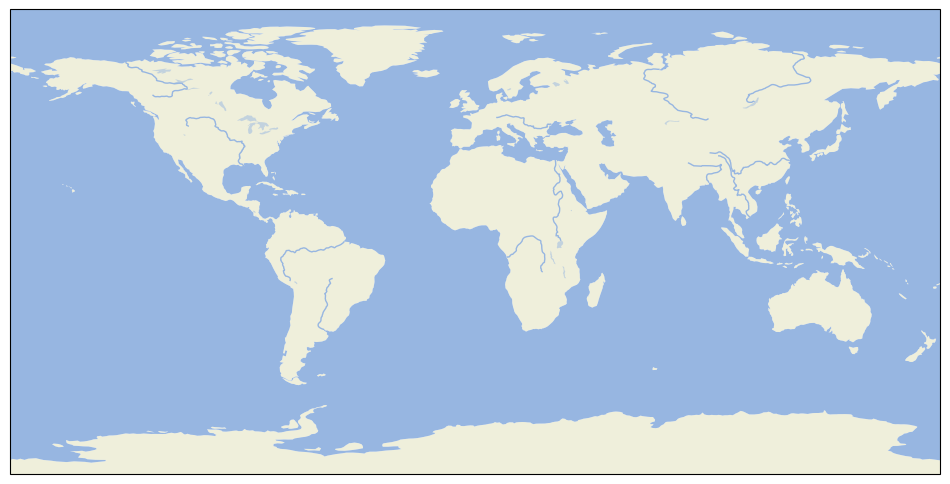

In [14]:
# This uses all the features, except "STATE"
# https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html

plt.figure(figsize=(12,12))
map4 = plt.axes(projection=ccrs.PlateCarree())
map4.add_feature(cfeature.LAND) # Adds green for land
map4.add_feature(cfeature.OCEAN) # Adds blue for water
#map4.add_feature(cfeature.COASTLINE) # Adds black border around coastline
#map4.add_feature(cfeature.BORDERS, linestyle=":") # Adds lines for country borders
map4.add_feature(cfeature.LAKES, alpha=0.5) # Adds lakes
map4.add_feature(cfeature.RIVERS) # Adds rivers

#map4.stock_img() # Makes the map look more real

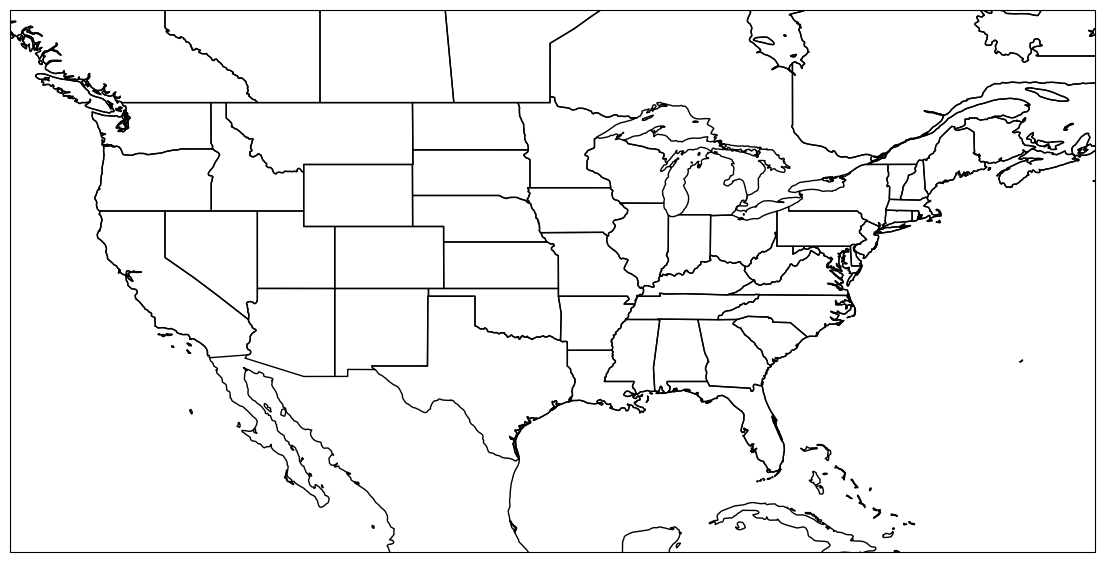

In [7]:
fig = plt.figure(figsize=(14,14))
map5 = plt.axes(projection=ccrs.PlateCarree())
map5.set_extent([-130,-60,20,55], ccrs.PlateCarree())
map5.add_feature(cfeature.STATES) # Shows the lines for each state in the US
map5.coastlines() # Without this line, it does not show Mexico


c:\Users\brely\anaconda3\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


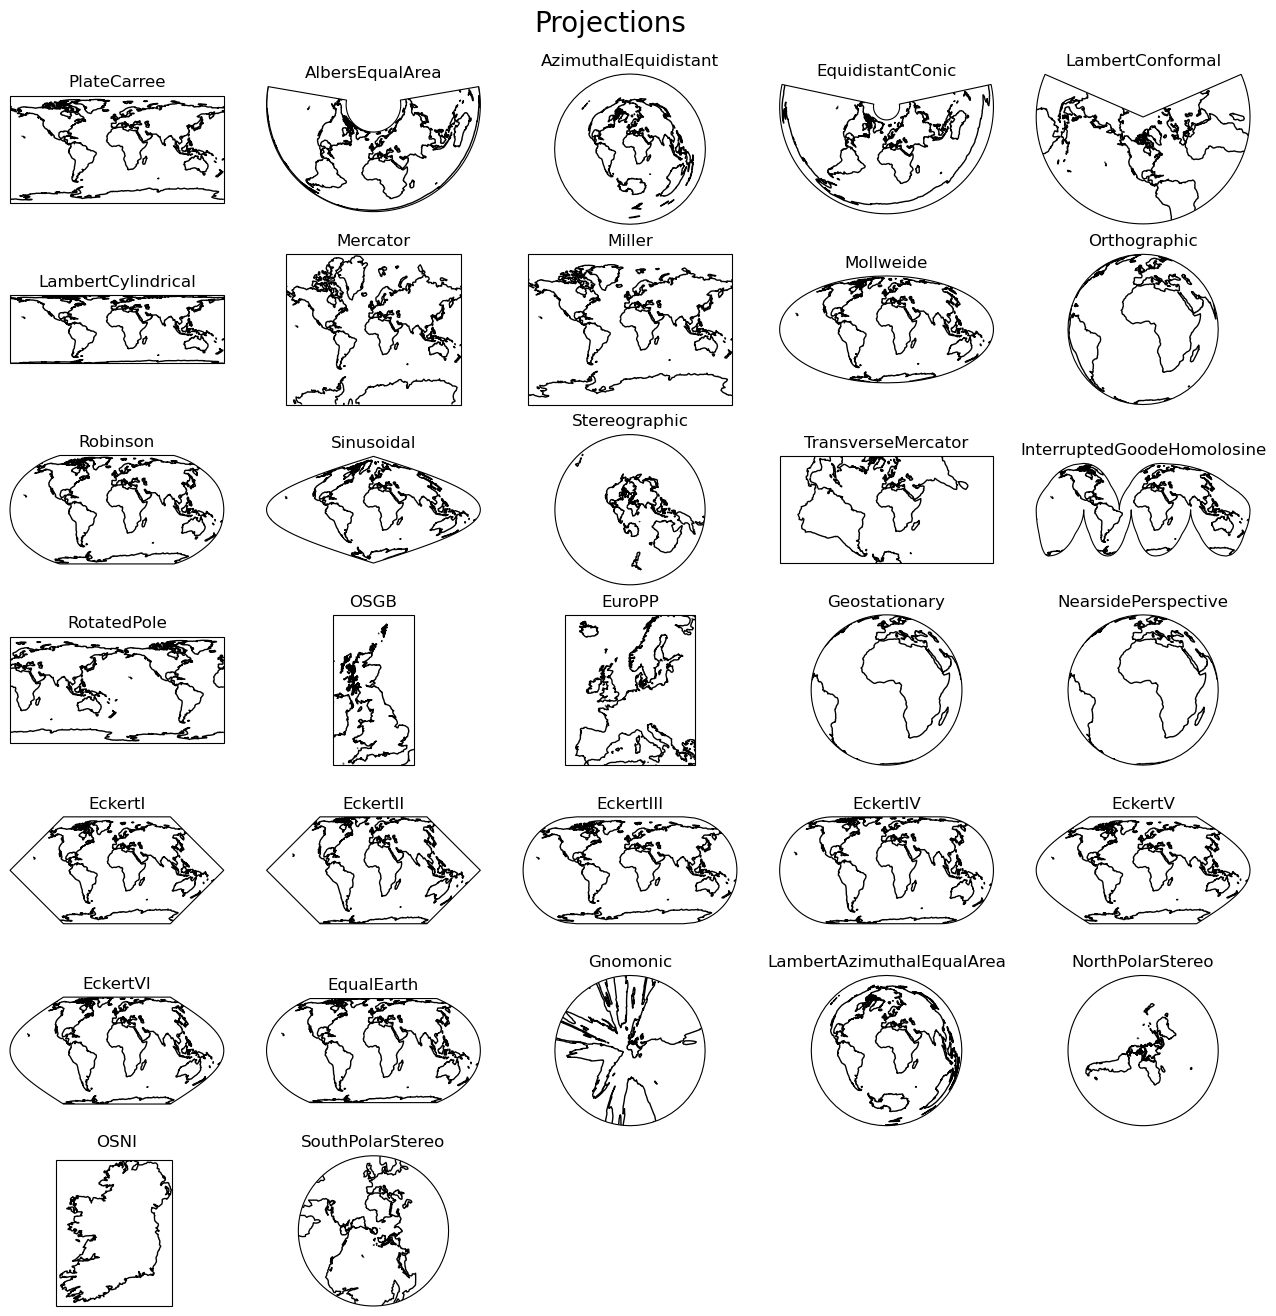

In [8]:
fig = plt.figure(figsize=(16,16))
fig.suptitle('Projections', fontsize=20, y=0.92)

projections = {'PlateCarree': ccrs.PlateCarree(), 'AlbersEqualArea': ccrs.AlbersEqualArea(), 
               'AzimuthalEquidistant': ccrs.AzimuthalEquidistant(), 'EquidistantConic': ccrs.EquidistantConic(), 
               'LambertConformal': ccrs.LambertConformal(), 'LambertCylindrical': ccrs.LambertCylindrical(), 
               'Mercator': ccrs.Mercator(), 'Miller': ccrs.Miller(), 'Mollweide': ccrs.Mollweide(), 
               'Orthographic': ccrs.Orthographic(), 'Robinson': ccrs.Robinson(), 'Sinusoidal': ccrs.Sinusoidal(), 
               'Stereographic': ccrs.Stereographic(), 'TransverseMercator': ccrs.TransverseMercator(), 
               'InterruptedGoodeHomolosine': ccrs.InterruptedGoodeHomolosine(),
               'RotatedPole': ccrs.RotatedPole(), 'OSGB': ccrs.OSGB(), 'EuroPP': ccrs.EuroPP(), 
               'Geostationary': ccrs.Geostationary(), 'NearsidePerspective': ccrs.NearsidePerspective(), 
               'EckertI': ccrs.EckertI(), 'EckertII': ccrs.EckertII(), 'EckertIII': ccrs.EckertIII(), 
               'EckertIV': ccrs.EckertIV(), 'EckertV': ccrs.EckertV(), 'EckertVI': ccrs.EckertVI(), 
               'EqualEarth': ccrs.EqualEarth(), 'Gnomonic': ccrs.Gnomonic(),
               'LambertAzimuthalEqualArea': ccrs.LambertAzimuthalEqualArea(), 
               'NorthPolarStereo': ccrs.NorthPolarStereo(), 'OSNI': ccrs.OSNI(), 
               'SouthPolarStereo': ccrs.SouthPolarStereo()}

for index, projection in enumerate(projections.items()):
    ax = fig.add_subplot(7, 5, index+1, projection=projection[1])
    ax.coastlines()
    ax.set_title(projection[0])

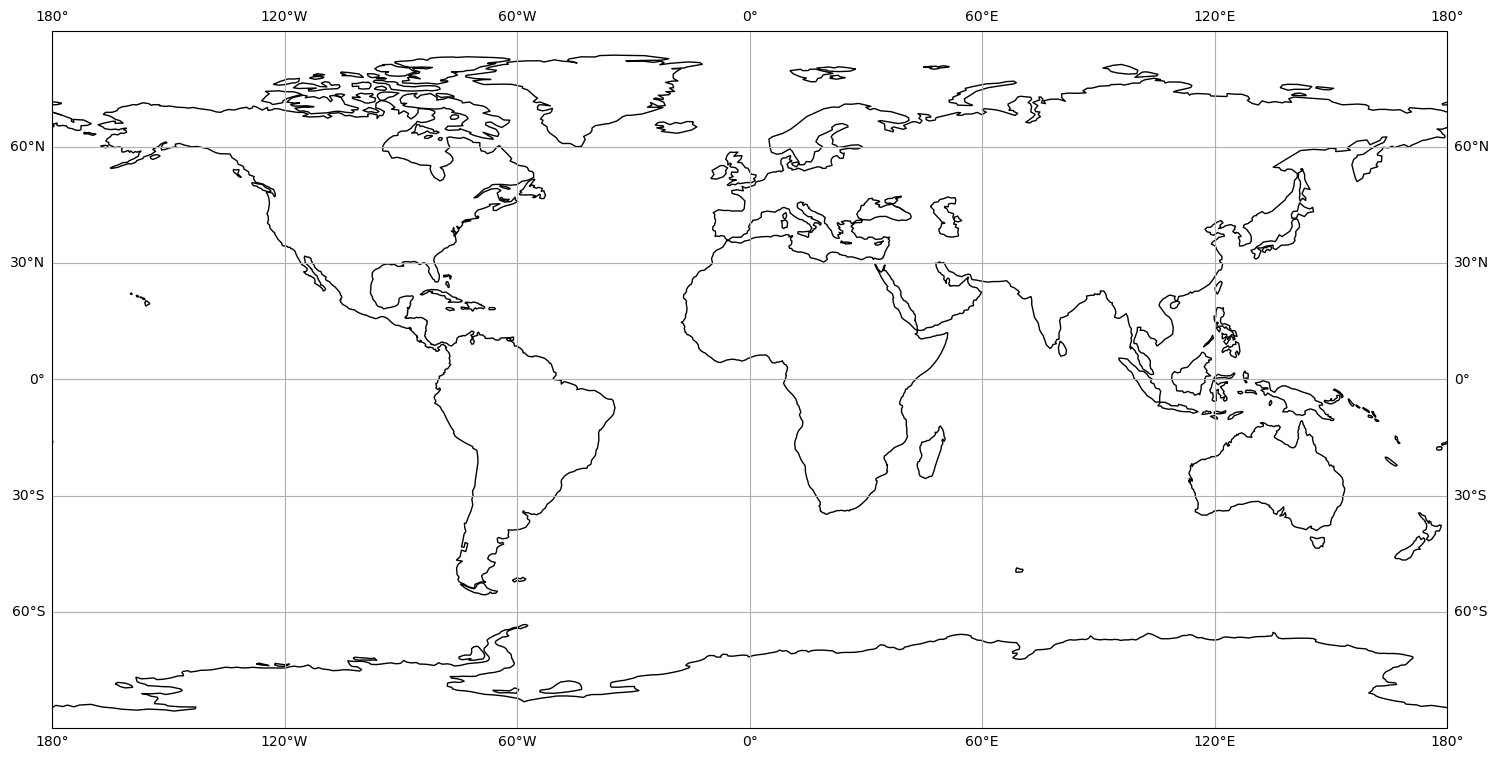

In [29]:
# Adding gridlines
plt.figure(figsize=(18,12))
map6 = plt.axes(projection=ccrs.PlateCarree())
grid_lines = map6.gridlines(draw_labels=True) # Draws the grid
map6.coastlines()

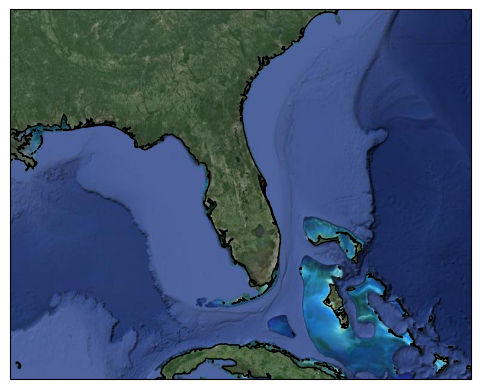

In [34]:
# Using map tiles
# https://scitools.org.uk/cartopy/docs/latest/gallery/web_services/image_tiles.html

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.io.img_tiles import GoogleTiles


def tileMap():
    tiler = GoogleTiles(style="satellite")
    mercator = tiler.crs

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=mercator)
    ax.set_extent([-90, -73, 22, 34], crs=ccrs.PlateCarree())

    ax.add_image(tiler, 6)

    ax.coastlines('10m')
    plt.show()

tileMap()


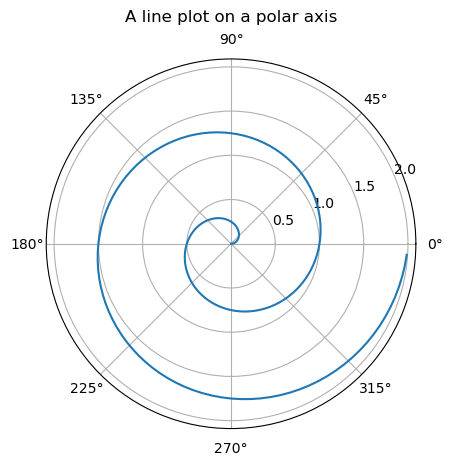

In [69]:
# https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/polar_demo.html#sphx-glr-gallery-pie-and-polar-charts-polar-demo-py

import numpy as np
import matplotlib.pyplot as plt

# Make a spiral
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

# Plot it
ax = plt.subplot(111, projection='polar')
ax.plot(theta, r) # Plots the blue spiral line
#ax.set_rmax(2) # Doesn't seem to do anything when commented out
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks - without this line, it will put a latitude line every 0.25
#ax.set_rlabel_position(-22.5)  # Moves the 0.5, 1.0, 1.5, 2.0 radial labels around clockwise (negative #s) or counter clockwise (positive #s)
#ax.grid(True) # Doesn't seem to do anything when commented out
ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()


In [ ]:
# https://scitools.org.uk/cartopy/docs/latest/gallery/scalar_data/eyja_volcano.html

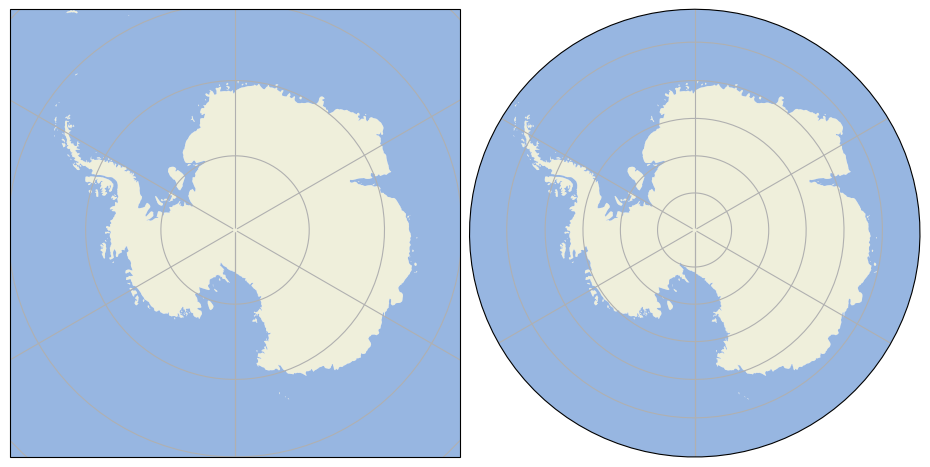

In [17]:
#################
#  SOUTH POLE   #
#################

import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plotSouthPole2Maps():
    fig = plt.figure(figsize=[10, 5])
    ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.SouthPolarStereo())
    ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.SouthPolarStereo(),
                          sharex=ax1, sharey=ax1)
    fig.subplots_adjust(bottom=0.05, top=0.95,
                        left=0.04, right=0.95, wspace=0.02)

    # Limit the map to -60 degrees latitude and below.
    ax1.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

    ax1.add_feature(cfeature.LAND)
    ax1.add_feature(cfeature.OCEAN)

    ax1.gridlines()
    ax2.gridlines()

    ax2.add_feature(cfeature.LAND)
    ax2.add_feature(cfeature.OCEAN)

    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax2.set_boundary(circle, transform=ax2.transAxes)

    plt.show()

plotSouthPole2Maps()

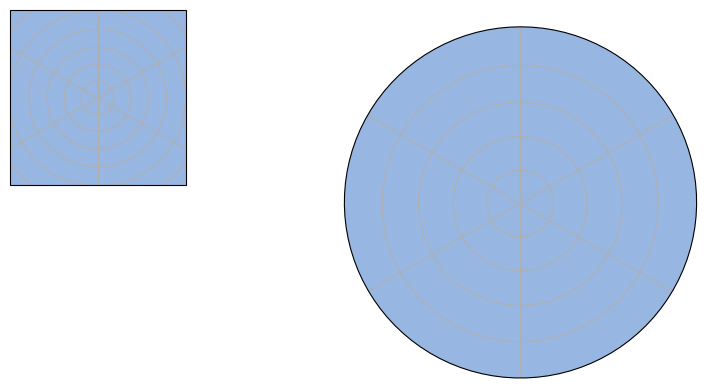

In [42]:
#################
#  NORTH POLE   #
#################

import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plotNorthPole2Maps():
    fig = plt.figure(figsize=[10, 5])

    # https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html
    # ADD_SUBPLOT: NROWS, NCOLS, INDEX, **KWARGS
        # 1 for nrows means there will only be one row of maps
        # 2 for ncols means there will be 2 columns of maps
        # the index means that which position (1 or 2) will the map appear
        # ax1 is in position 1; ax2 is in position 2
    ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.NorthPolarStereo())
    ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.NorthPolarStereo(),
                          sharex=ax1, sharey=ax1)

    
    fig.subplots_adjust(bottom=0.05, top=0.95,
                        left=0.04, right=0.95, wspace=0.02)

    # Limit the map to -60 degrees latitude and below.
    # Format[]
    ax1.set_extent([-180,180,40,90], ccrs.PlateCarree())

    ax1.add_feature(cfeature.LAND)
    ax1.add_feature(cfeature.OCEAN)

    ax1.gridlines()
    ax2.gridlines()

    ax2.add_feature(cfeature.LAND)
    ax2.add_feature(cfeature.OCEAN)

    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax2.set_boundary(circle, transform=ax2.transAxes)

    plt.show()

plotNorthPole2Maps()